# Unit 5.6. The Benefits of Logging Your Model Training
## Part 3. Using a CSV Logger

In [1]:
import lightning as L
import torch
from shared_utilities import PyTorchMLP, LightningModel, MNISTDataModule

In [2]:
from lightning.pytorch.loggers import CSVLogger ### New

In [3]:
torch.manual_seed(123)

dm = MNISTDataModule()

pytorch_model = PyTorchMLP(num_features=784, num_classes=10)

lightning_model = LightningModel(model=pytorch_model, learning_rate=0.05)

trainer = L.Trainer(
    max_epochs=10,
    accelerator="cpu",
    devices="auto",
    logger=CSVLogger(save_dir="logs/", name="my-model"), ### NEW
    deterministic=True,
)

trainer.fit(model=lightning_model, datamodule=dm)

GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
/Users/alimtleuliyev/anaconda3/lib/python3.10/site-packages/lightning/pytorch/callbacks/model_checkpoint.py:612: UserWarning: Checkpoint directory logs/my-model/version_0/checkpoints exists and is not empty.
  rank_zero_warn(f"Checkpoint directory {dirpath} exists and is not empty.")

  | Name      | Type               | Params
-------------------------------------------------
0 | model     | PyTorchMLP         | 40.8 K
1 | train_acc | MulticlassAccuracy | 0     
2 | val_acc   | MulticlassAccuracy | 0     
3 | test_acc  | MulticlassAccuracy | 0     
-------------------------------------------------
40.8 K    Trainable params
0         Non-trainable params
40.8 K    Total params
0.163     Total estimated model params size (MB)
/Users/alimtleuliyev/anaconda3/lib/python3.10/site-packages/lightning/fabric/loggers/csv_logs.py:188: UserWarning: Ex

Sanity Checking DataLoader 0:   0%|          | 0/2 [00:00<?, ?it/s]

/Users/alimtleuliyev/anaconda3/lib/python3.10/site-packages/lightning/pytorch/trainer/connectors/data_connector.py:430: PossibleUserWarning: The dataloader, val_dataloader, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 8 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


/Users/alimtleuliyev/anaconda3/lib/python3.10/site-packages/lightning/pytorch/trainer/connectors/data_connector.py:430: PossibleUserWarning: The dataloader, train_dataloader, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 8 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Epoch 9: 100%|██████████| 859/859 [00:07<00:00, 107.99it/s, v_num=0, val_loss=0.114, val_acc=0.967, train_acc=0.974]

`Trainer.fit` stopped: `max_epochs=10` reached.


Epoch 9: 100%|██████████| 859/859 [00:07<00:00, 107.93it/s, v_num=0, val_loss=0.114, val_acc=0.967, train_acc=0.974]


In [4]:
train_acc = trainer.validate(dataloaders=dm.train_dataloader())[0]["val_acc"]
val_acc = trainer.validate(datamodule=dm)[0]["val_acc"]
test_acc = trainer.test(datamodule=dm)[0]["test_acc"]

print(f'Train Acc {train_acc*100:.2f}')
print(f'Val Acc {val_acc*100:.2f}')
print(f'Test Acc {test_acc*100:.2f}')

/Users/alimtleuliyev/anaconda3/lib/python3.10/site-packages/lightning/pytorch/trainer/connectors/checkpoint_connector.py:148: UserWarning: `.validate(ckpt_path=None)` was called without a model. The best model of the previous `fit` call will be used. You can pass `.validate(ckpt_path='best')` to use the best model or `.validate(ckpt_path='last')` to use the last model. If you pass a value, this warning will be silenced.
  rank_zero_warn(
Restoring states from the checkpoint path at logs/my-model/version_0/checkpoints/epoch=9-step=8590.ckpt
Loaded model weights from the checkpoint at logs/my-model/version_0/checkpoints/epoch=9-step=8590.ckpt
/Users/alimtleuliyev/anaconda3/lib/python3.10/site-packages/lightning/pytorch/trainer/connectors/data_connector.py:478: PossibleUserWarning: Your `val_dataloader`'s sampler has shuffling enabled, it is strongly recommended that you turn shuffling off for val/test dataloaders.
  rank_zero_warn(


Validation DataLoader 0: 100%|██████████| 859/859 [00:05<00:00, 166.27it/s]


┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃      Validate metric      ┃       DataLoader 0        ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│          val_acc          │    0.9771900177001953     │
│         val_loss          │    0.07813331484794617    │
└───────────────────────────┴───────────────────────────┘

Restoring states from the checkpoint path at logs/my-model/version_0/checkpoints/epoch=9-step=8590.ckpt
Loaded model weights from the checkpoint at logs/my-model/version_0/checkpoints/epoch=9-step=8590.ckpt


Validation DataLoader 0: 100%|██████████| 79/79 [00:00<00:00, 141.65it/s]


┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃      Validate metric      ┃       DataLoader 0        ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│          val_acc          │    0.9733999967575073     │
│         val_loss          │    0.09263420104980469    │
└───────────────────────────┴───────────────────────────┘

/Users/alimtleuliyev/anaconda3/lib/python3.10/site-packages/lightning/pytorch/trainer/connectors/checkpoint_connector.py:148: UserWarning: `.test(ckpt_path=None)` was called without a model. The best model of the previous `fit` call will be used. You can pass `.test(ckpt_path='best')` to use the best model or `.test(ckpt_path='last')` to use the last model. If you pass a value, this warning will be silenced.
  rank_zero_warn(
Restoring states from the checkpoint path at logs/my-model/version_0/checkpoints/epoch=9-step=8590.ckpt
Loaded model weights from the checkpoint at logs/my-model/version_0/checkpoints/epoch=9-step=8590.ckpt
/Users/alimtleuliyev/anaconda3/lib/python3.10/site-packages/lightning/pytorch/trainer/connectors/data_connector.py:430: PossibleUserWarning: The dataloader, test_dataloader, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 8 which is the number of cpus on this machine) in the `DataLoader` in

Testing DataLoader 0: 100%|██████████| 157/157 [00:00<00:00, 177.14it/s]


┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃        Test metric        ┃       DataLoader 0        ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│         test_acc          │    0.9695000052452087     │
└───────────────────────────┴───────────────────────────┘

Train Acc 97.72
Val Acc 97.34
Test Acc 96.95


In [5]:
import pandas as pd

metrics = pd.read_csv(f"{trainer.logger.log_dir}/metrics.csv")
metrics.groupby("epoch").mean()

,train_loss,step,val_loss,val_acc,train_acc,test_acc
epoch,,,,,,
0,0.758056,492.052632,0.359676,0.895600,0.770627,NaN
1,0.251315,1343.000000,0.263247,0.926200,0.912817,NaN
2,0.247338,2193.947368,0.218240,0.933400,0.933480,NaN
3,0.170083,3044.894737,0.175992,0.950000,0.946850,NaN
4,0.120723,3895.842105,0.154856,0.953400,0.954744,NaN
5,0.136193,4766.900000,0.137969,0.958800,0.960619,NaN
6,0.130836,5642.473684,0.132187,0.961000,0.965167,NaN
7,0.106169,6493.421053,0.122143,0.964000,0.968695,NaN
8,0.091124,7344.368421,0.121284,0.963200,0.972024,NaN


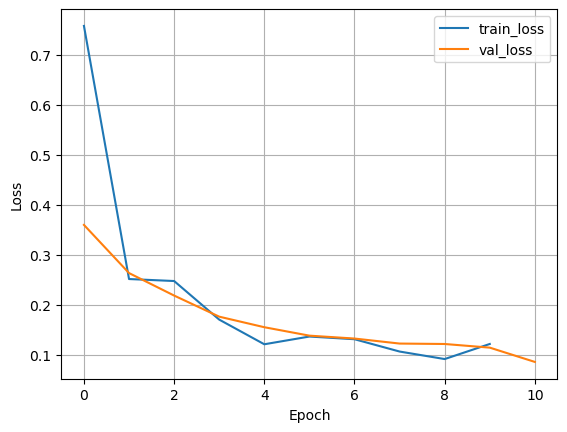

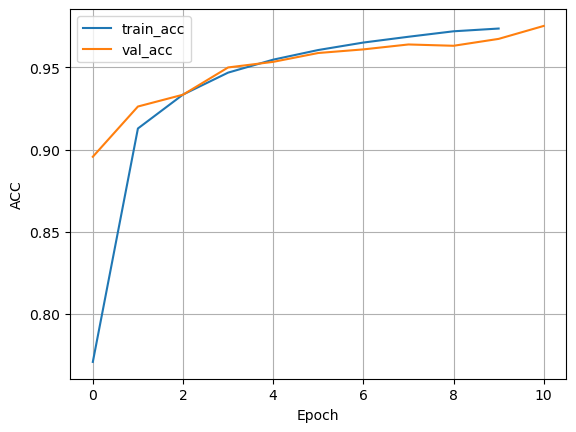

In [6]:
import pandas as pd
import matplotlib.pyplot as plt


metrics = pd.read_csv(f"{trainer.logger.log_dir}/metrics.csv")

aggreg_metrics = []
agg_col = "epoch"
for i, dfg in metrics.groupby(agg_col):
    agg = dict(dfg.mean())
    agg[agg_col] = i
    aggreg_metrics.append(agg)

df_metrics = pd.DataFrame(aggreg_metrics)
df_metrics[["train_loss", "val_loss"]].plot(
    grid=True, legend=True, xlabel="Epoch", ylabel="Loss"
)
df_metrics[["train_acc", "val_acc"]].plot(
    grid=True, legend=True, xlabel="Epoch", ylabel="ACC"
)

plt.show()